In [75]:
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import os
import cv2
import matplotlib.pyplot as plt
import random
from numpy import save
from numpy import savez_compressed
from numpy import load
import pickle

In [3]:
df=pd.read_csv('full_df.csv')

In [4]:
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg


In [5]:
def Hypertension(x):
    if 'hypertensive' in x:
        return 1
    else:
        return 0

In [6]:
df["left_Hypertension"] = df["Left-Diagnostic Keywords"].apply(lambda x: Hypertension(x))
df["right_Hypertension"] = df["Right-Diagnostic Keywords"].apply(lambda x: Hypertension(x))

In [7]:
left_hyper = df.loc[(df.left_Hypertension == 1)]["Left-Fundus"].values

In [8]:
right_hyper = df.loc[(df.right_Hypertension == 1)]["Right-Fundus"].values

In [9]:
hypertension = np.concatenate((left_hyper,right_hyper),axis=0)

In [10]:
len(hypertension)

382

In [11]:
def AgeMac(x):
    if 'age-related' in x:
        return 1
    else:
        return 0

In [12]:
df["left_Age"] = df["Left-Diagnostic Keywords"].apply(lambda x: AgeMac(x))
df["right_Age"] = df["Right-Diagnostic Keywords"].apply(lambda x: AgeMac(x))

In [13]:
left_Age = df.loc[(df.left_Age == 1)]["Left-Fundus"].values
right_Age = df.loc[(df.right_Age == 1)]["Right-Fundus"].values
Agemacu = np.concatenate((left_Age,right_Age),axis=0)

In [14]:
len(Agemacu)

551

In [15]:
def glau(x):
    if 'glaucoma' in x:
        return 1
    else:
        return 0

In [16]:
df["left_glau"] = df["Left-Diagnostic Keywords"].apply(lambda x: glau(x))
df["right_glau"] = df["Right-Diagnostic Keywords"].apply(lambda x: glau(x))

In [17]:
left_ = df.loc[(df.left_glau == 1)]["Left-Fundus"].values
right_ = df.loc[(df.right_glau == 1)]["Right-Fundus"].values
glaucoma = np.concatenate((left_,right_),axis=0)

In [18]:
len(glaucoma)

616

In [19]:
def myopia(x):
    if 'myopia' in x:
        return 1
    else:
        return 0

In [20]:
df["left_myopia"] = df["Left-Diagnostic Keywords"].apply(lambda x: myopia(x))
df["right_myopia"] = df["Right-Diagnostic Keywords"].apply(lambda x: myopia(x))

In [21]:
left_ = df.loc[(df.left_myopia == 1)]["Left-Fundus"].values
right_ = df.loc[(df.right_myopia == 1)]["Right-Fundus"].values
myopia = np.concatenate((left_,right_),axis=0)

In [22]:
len(myopia)

479

In [23]:
def normal(x):
    if 'normal' in x:
        return 1
    else:
        return 0

In [24]:
df["left_normal"] = df["Left-Diagnostic Keywords"].apply(lambda x: normal(x))
df["right_"] = df["Right-Diagnostic Keywords"].apply(lambda x: normal(x))

In [25]:
normal = df.loc[(df.N == 1)]["filename"].values


In [26]:
len(normal)

2101

In [27]:
df.labels.value_counts()

['N']    2873
['D']    1608
['O']     708
['C']     293
['G']     284
['A']     266
['M']     232
['H']     128
Name: labels, dtype: int64

In [28]:
other=df.loc[(df.O == 1)]["filename"].values

In [29]:
len(other)

1588

In [30]:
diabetes=df.loc[(df.D == 1)]["filename"].values

In [31]:
len(diabetes)

2123

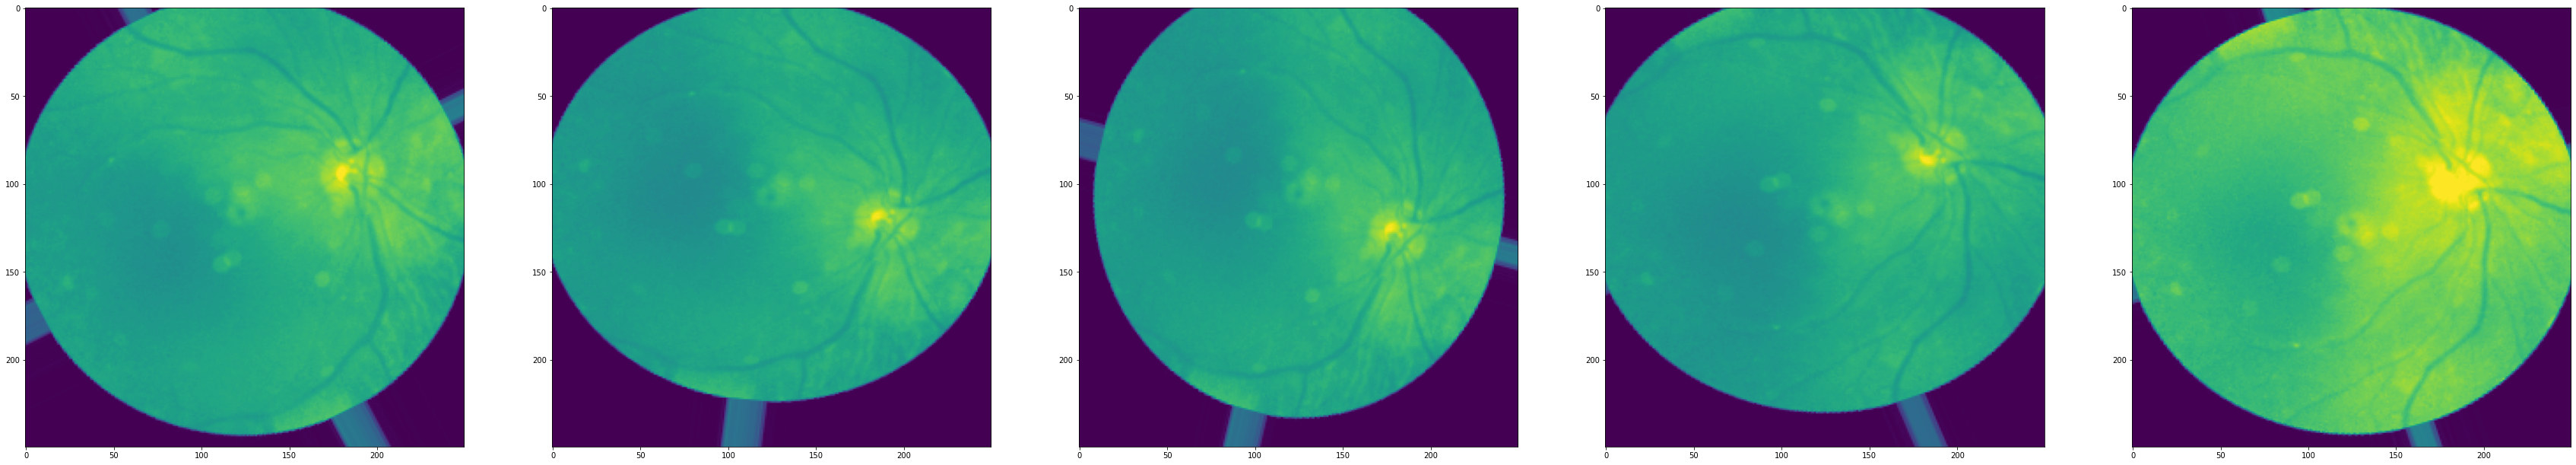

In [32]:
img= cv2.imread(f"Datos/preprocessed_2/24_left.jpg",0)
img = cv2.resize(img, (250,250))
img = img.astype(np.float32)/255
img = img.reshape((1,) + img.shape)
img = img[..., np.newaxis]
train_datagen = ImageDataGenerator(
                    rotation_range=30,
                    zoom_range=0.1,
                    vertical_flip=True,
                    brightness_range=(0.2, 1.5),
                    height_shift_range=0.1)
i = 0
count=1
f = plt.figure(figsize=(60,30))
it = train_datagen.flow(x=img, batch_size=1)
for i in range(5):
    ax = f.add_subplot(2, 5,count)
    
    batch = it.next()
    aug_img = batch[0]
    ax = plt.imshow(aug_img)
    count=count +1
plt.show()

In [33]:
Data=[]

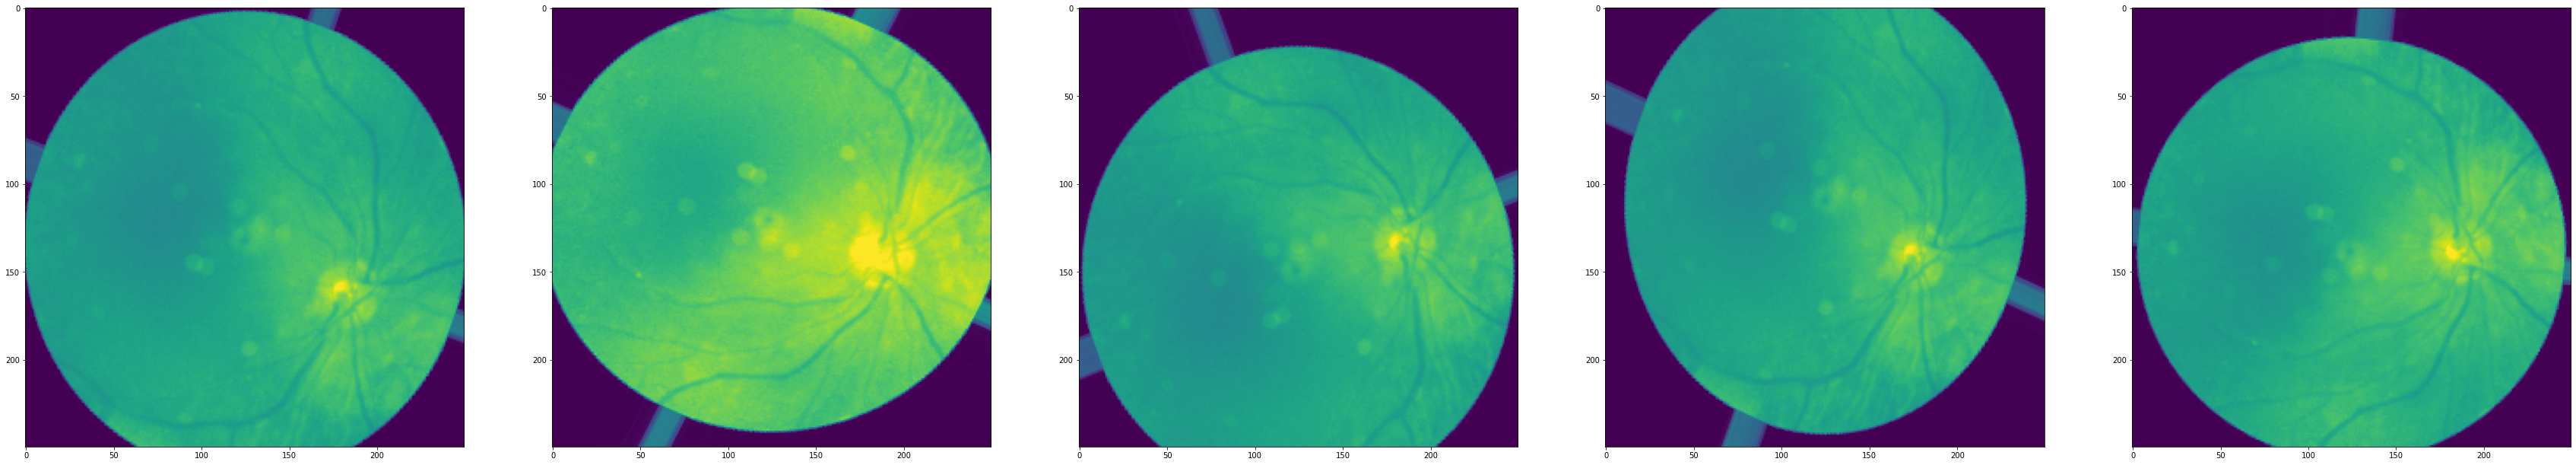

In [34]:
img= cv2.imread(f"Datos/preprocessed_2/24_left.jpg",0)
img = cv2.resize(img, (250,250))
img = img.astype(np.float32)/255
img = img.reshape((1,) + img.shape)
img = img[..., np.newaxis]
train_datagen = ImageDataGenerator(
                    rotation_range=30,
                    zoom_range=0.1,
                    vertical_flip=True,
                    brightness_range=(0.2, 1.5),
                    height_shift_range=0.1)
count=1
f = plt.figure(figsize=(60,30))
it = train_datagen.flow(x=img, batch_size=1)
for i in range(5):
    ax = f.add_subplot(2, 5,count)
    batch = it.next()
    aug_img = batch[0]
    Data.append(aug_img)
    ax = plt.imshow(aug_img)
    count=count +1
plt.show()

In [35]:
len(Data)

5

In [36]:
def augment(category,label,mult):
    x=[]
    for img in category:
        try:
            img = cv2.imread(f"Datos/preprocessed_2/{img}",0)
            img = cv2.resize(img, (250,250))
            img = img.astype(np.float32)/255
            img = img[..., np.newaxis]
        except:
            continue
        train_datagen = ImageDataGenerator(
                    rotation_range=30,
                    zoom_range=0.1,
                    vertical_flip=True,
                    brightness_range=(0.2, 1.5),
                    height_shift_range=0.1,
                    )
        img = img.reshape((1,) + img.shape)
        count=1
        it = train_datagen.flow(x=img, batch_size=1)
        for i in range(mult):
            batch = it.next()
            aug_img = batch[0]
            aug_img=aug_img.reshape(-1)
            x.append([np.array(img),np.array(label)])
            count=count +1
       
    for i in range(len(x)):
        x[i][0]=x[i][0].reshape(x[i][0].shape[1:])
    return x

In [37]:
Myopia_aumentada=augment(myopia,5,5)

In [40]:
Hypertension_aumentada=augment(hypertension,2,6)

In [41]:
Glaucoma_aumentada=augment(glaucoma,1, 3)

In [42]:
Agemacu_aumentada=augment(Agemacu, 3,4)

In [49]:
def create_dataset(image_category,label):
    dataset_dir = "Datos/preprocessed_2"
    image_size=250
    labels = []
    dataset = []
    for img in image_category:
        image_path = os.path.join(dataset_dir,img)
        try:
            img = cv2.imread(image_path,0)
            img = cv2.resize(img, (250,250))
            img = img.astype(np.float32)/255
            img = img[..., np.newaxis]
            
        except:
            continue
        
        dataset.append([np.array(img),np.array(label)])
    random.shuffle(dataset)
    return dataset

In [50]:
Myopia=create_dataset(myopia,5)

In [52]:
Hypertension=create_dataset(hypertension,2)

In [53]:
Glaucoma= create_dataset(glaucoma,1)

In [55]:
Age_macu=create_dataset(Agemacu,3)

In [56]:
Normal= create_dataset(normal,0)

In [57]:
Diabetes=create_dataset(diabetes,4)

In [58]:
Other=create_dataset(other,6)

In [51]:
Myopia[0][0].shape

(250, 250, 1)

In [60]:
FULLMYOPIA=Myopia+Myopia_aumentada

In [81]:
MyopioNO=FULLMYOPIA+Normal

In [82]:
x = np.array([i[0]for i in MyopioNO])
y = np.array([i[1] for i in MyopioNO])

In [65]:
x.shape

(2838, 250, 250, 1)

In [85]:
save('x',x)

In [80]:
y[0]

5